In [7]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt

# Clustering der Bank Daten mittels dem RFM Modell

Einlesen der Bankdaten und da wir die Attribute 'gender', 'merchant', 'category','age' in diesem Beispiel nicht brauchen verwerfen wir sie direkt

In [8]:
file_name = '~/neuefische/data-fish/data/bank_transactions.csv'
data = pd.read_csv(file_name) 

In [9]:
data.drop(['gender', 'merchant', 'category','age'], axis=1, inplace=True)

In [10]:
data.head()

,step,customer,amount,fraud
0,0,C1093826151,4.55,0
1,0,C352968107,39.68,0
2,0,C2054744914,26.89,0
3,0,C1760612790,17.25,0
4,0,C757503768,35.72,0


In [13]:
mean_values = data.groupby('customer').mean().drop(['step'], axis=1)
fraud_values = data.groupby('customer').sum().drop(['step','amount'], axis=1).rename(index=str, columns={"fraud": "fraud_absolute"})
max_values = data.groupby('customer').max().drop(['amount', 'fraud'], axis=1).rename(index=str, columns={"step": "recency"})
count_values = data.groupby('customer').count().drop(['amount', 'fraud'], axis=1).rename(index=str, columns={"step": "frequency"})

In [14]:
rfm_data = pd.concat([mean_values, max_values, count_values, fraud_values], axis=1, sort=False)
rfm_data['recency'] = 179 - rfm_data['recency']

---

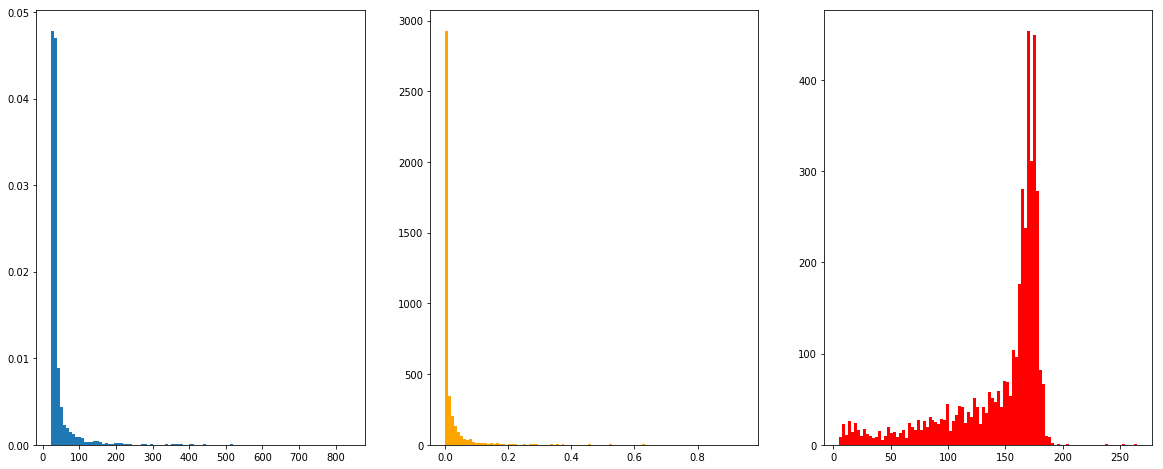

In [16]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,3, 1 )
plt.hist(rfm_data['amount'], bins=100, density=True)

plt.subplot(1,3, 2 )
plt.hist(rfm_data['fraud'], bins=100, color='orange')

plt.subplot(1,3, 3 )
plt.hist(rfm_data['frequency'], bins=100, color='red')


plt.show()

---

Für die Visualisierung könnt ihr folgendes benutzen:

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# für interactive Plots in jupyter notebooks
%matplotlib notebook

In [ ]:
fig = plt.figure().gca(projection='3d')
fig.set_xlabel('recency')
fig.set_ylabel('frequency')
fig.set_zlabel('amount')
fig.scatter(data['recency'], data['frequency'], data['amount']);